In [0]:
import networkx as nx
import matplotlib.pyplot as plt

### Crea un nuevo grafo

In [0]:
G = nx.Graph()

### Añade un nodo al grafo

In [216]:
# Añade un nodo al grafo
G.add_node("a")

# Añade varios nodos al grafo
G.add_nodes_from(["b", "c"])

print("Nodos del grafo: ", G.nodes())

Nodos del grafo:  ['a', 'b', 'c']


### Añade una conexión al grafo

Nodos del grafo:  ['a', 'b', 'c', 'd', 'e', 1, 2]
Conexiones del grafo:  [('a', 'c'), ('a', 1), ('a', 2), ('b', 'c'), ('c', 'd'), ('d', 'e'), ('d', 1), (1, 2)]


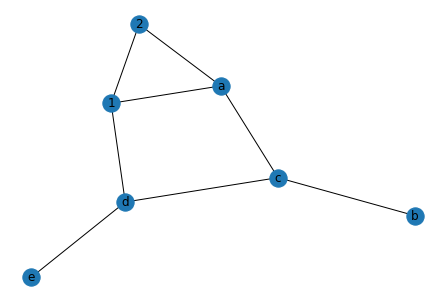

In [217]:
# Añade una conexión al grafo entre dos nodos existentes
edge = ("b", "c")
G.add_edge(*edge)

# Añade una conexión al grafo, si los nodos a conectar no existe, se crean
G.add_edge("d", "e")
G.add_edge(1, 2)

# Añade una lista de conexiones al grafo, si los nodos no existen, se crean
G.add_edges_from([("a", "c"), ("c", "d"), ("a", 1), (1, "d"), ("a", 2)])

print("Nodos del grafo: ", G.nodes())
print("Conexiones del grafo: ", G.edges())

# Imprime el grafo
nx.draw(G, with_labels=True)

### Crea un grafo con un número de nodos predefinidos

Nodos del grafo:  [0, 1, 2, 3]
Conexiones del grafo:  [(0, 1), (1, 2), (2, 3)]


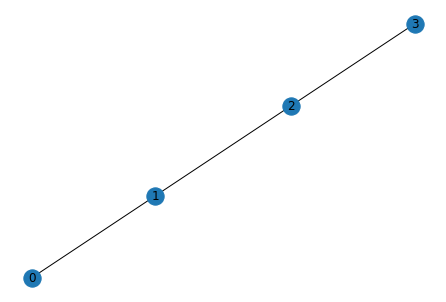

In [218]:
# El argumento es la cantidad de nodos del grafo, conectados consecutivamente
G = nx.path_graph(4)

print("Nodos del grafo: ", G.nodes())
print("Conexiones del grafo: ", G.edges())

nx.draw(G, with_labels=True)

### Otro ejemplo, ampliando el anterior

Nodos del grafo:  ['Caracas', 'Bogotá', 'Quito', 'La Paz']
Conexiones del grafo:  [('Caracas', 'Bogotá'), ('Bogotá', 'Quito'), ('Quito', 'La Paz')]


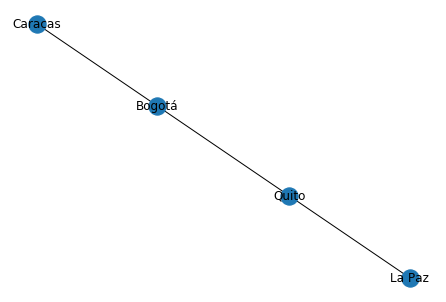

In [219]:
# Crea un nuevo grafo
G = nx.path_graph(4)
ciudades = {0:"Caracas", 1:"Bogotá", 2:"Quito", 3:"La Paz"}

# Cambia el nombre de las etiquetas
H = nx.relabel_nodes(G, ciudades)

print("Nodos del grafo: ", H.nodes())
print("Conexiones del grafo: ", H.edges())
 
nx.draw(H, with_labels=True)

### Crea un grafo, y cambia los nombres de las etiquetas a los 5 primeros nodos

In [220]:
G = nx.path_graph(10)
mapeo = dict(zip(G.nodes(), "abcde"))
nx.relabel_nodes(G, mapeo, copy=False)
 
print("Nodos del grafo: ", G.nodes())

Nodos del grafo:  [5, 6, 7, 8, 9, 'a', 'b', 'c', 'd', 'e']


### Otro ejemplo, ampliando el anterior

In [221]:
# Crea un nuevo grafo
G = nx.path_graph(10)

def mapeo(x):
    return x + 100

nx.relabel_nodes(G, mapeo, copy=False)
 
print("Nodos del grafo: ", G.nodes())

Nodos del grafo:  [100, 101, 102, 103, 104, 105, 106, 107, 108, 109]


### Añade atributos al grafo

In [222]:
# Crea un nuevo grafo
G = nx.path_graph(4)

# Añade atributos al grafo
G.graph["atributo1"] = "valor1"
G.graph["atributo2"] = "valor2"
print(G.graph)

# Añade atributos a los nodos, si el nodo lo existe lo crea
G.add_node(1, hora="8am")
G.add_nodes_from([3], hora="4pm")
G.node[1]["salón"] = 15
print(G.node[1])
G.add_node(4, hora="9am") # El nodo no existe, se crea
print(G.node[4])

# Añade atributos a las conexiones
G.add_edge(1, 2, weight=4.7)
G.add_edges_from([(3, 4),(4, 5)], color="rojo")
G.add_edges_from([(1, 2, {"color": "azul"}), (2, 3, {"weight": 8})])
G.add_edge(1, 3)
G[1][3]["weight"] = 5.7
print(G.edges[3, 4])
print(G.edges[4, 5])
print(G.edges[1, 2])
print(G.edges[2, 3])
print(G.edges[1, 3])

print("Nodos del grafo: ", G.nodes())
print("Conexiones del grafo: ", G.edges())

{'atributo1': 'valor1', 'atributo2': 'valor2'}
{'hora': '8am', 'salón': 15}
{'hora': '9am'}
{'color': 'rojo'}
{'color': 'rojo'}
{'weight': 4.7, 'color': 'azul'}
{'weight': 8}
{'weight': 5.7}
Nodos del grafo:  [0, 1, 2, 3, 4, 5]
Conexiones del grafo:  [(0, 1), (1, 2), (1, 3), (2, 3), (3, 4), (4, 5)]


### Grafos dirijidos

Nodos del grafo:  [1, 2, 3]
Conexiones del grafo:  [(1, 2), (2, 3)]


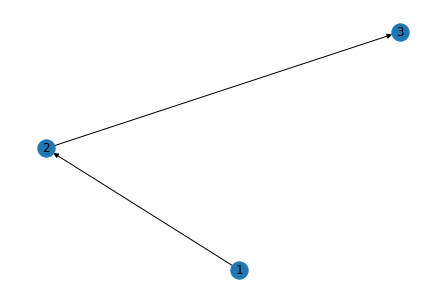

In [223]:
# Crea un nuevo grafo
DG = nx.DiGraph()

# Añade conexiones con pesos, los números reales representan los pesos
DG.add_weighted_edges_from([(1, 2, 0.5), (2, 3, 0.75)])

print("Nodos del grafo: ", DG.nodes())
print("Conexiones del grafo: ", DG.edges())

nx.draw(DG, with_labels=True)

### Ampliando el ejemplo anterior

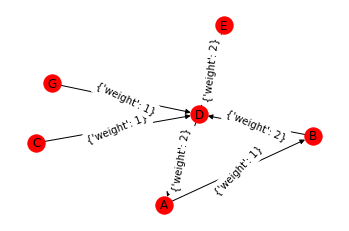

In [224]:
# Crea un nuevo grafo
DG = nx.DiGraph()

# Añade un mismo peso a las conexiones de los nodos
DG.add_edges_from([("A", "B"),("C","D"),("G","D")], weight=1)
DG.add_edges_from([("D","A"),("D","E"),("B","D"),("D","E")], weight=2)

pos = nx.spring_layout(DG) # Position nodes using Fruchterman-Reingold force-directed algorithm. Tomado de la documentación oficial
nx.draw_networkx_edge_labels(DG, pos)
nx.draw(DG, pos, node_color="red", with_labels=True)